In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

2021-12-20 18:43:45.288332: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu/gazebo-11/plugins:/opt/ros/foxy/opt/yaml_cpp_vendor/lib:/opt/ros/foxy/opt/rviz_ogre_vendor/lib:/opt/ros/foxy/lib/x86_64-linux-gnu:/opt/ros/foxy/lib
2021-12-20 18:43:45.288927: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
models = [np.loadtxt("./predictResult2/result" + str(i) + ".txt").reshape(70000, 10) for i in range(0, 10)]

In [4]:
errors = [0 for i in range(20)]

In [5]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
    x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
    x_train, x_test = x_train.astype("float32"), x_test.astype("float32")
    x_train, x_test = x_train / 255., x_test / 255.
    x = np.concatenate((x_train, x_test), axis=0)
    y = np.concatenate((y_train, y_test), axis=0)

    return x, y

In [6]:
x, y = load_data()

In [7]:
for i in range(70000):
    vote = [0 for k in range(10)]
    for j in range(10):
        prediction = np.argmax(models[j][i])
        vote[prediction] += 1
        if np.argmax(vote) != y[i]:
            errors[j + 10] += 1
        if prediction != y[i]:
            errors[j] += 1

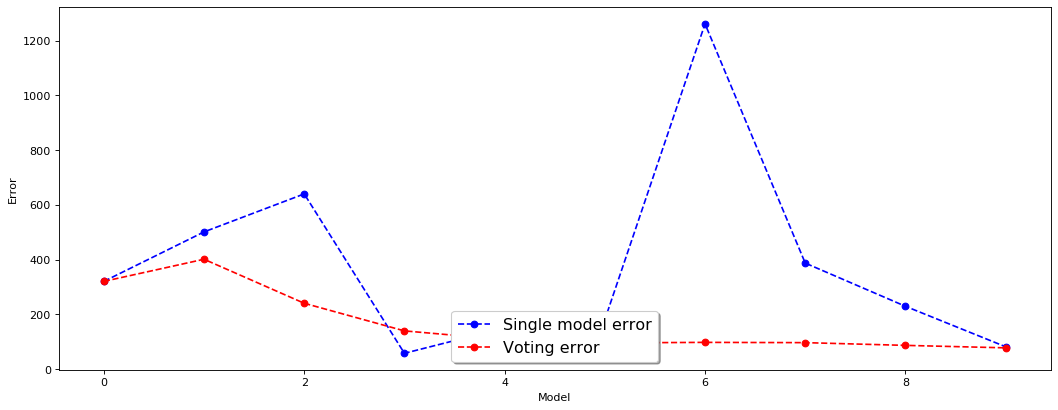

In [8]:
fig, ax = plt.subplots(figsize=(16, 6), dpi=80)
ax.plot(errors[:10], 'bo--', label="Single model error")
ax.plot(errors[10:], 'ro--', label="Voting error")
plt.ylabel('Error')
plt.xlabel('Model')
legend = ax.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.show()

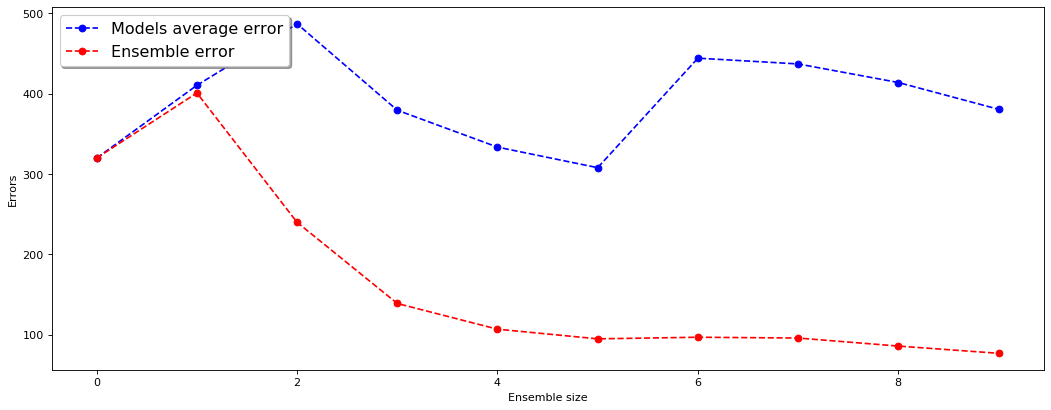

In [9]:
sum_err = [sum(errors[:i]) / i for i in range(1, 11)]
fig, ax = plt.subplots(figsize=(16, 6), dpi=80)
ax.plot(sum_err, 'bo--', label="Models average error")
ax.plot(errors[10:], 'ro--', label="Ensemble error")
plt.ylabel('Errors')
plt.xlabel('Ensemble size')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

In [10]:
errors[10:]

[320, 401, 240, 139, 107, 95, 97, 96, 86, 77]